# Convoluted Neural Network

In this example, we will be using a dataset "cifar10" which comes as part of keras within tensorflow.  The cifar10 dataset has 60,000 images belonging to 10 different Classes.  These include ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'].



In [1]:
# prompt: Load libraries to build a CNN model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


## Load cifar10 dataset from keras

The dataset is split into train and test datasets.

Dimensions of train dataset is 50,000 images, each has 32x32 pixels and 3 channels for Red,Green,Blue.  y_train has labels assigned to each image.

Dimensions of test dataset is 10,000 images, each has 32x32 pixels and 3 channels for Red,Green,Blue.  y_test has labels assigned to each image.

In [12]:
# prompt: Load cifar10 dataset from keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


(10000, 1)

## Flatten the Label Values

Before, we send these images to the CNN model, we need to first reduce the pixel values from 1-255 to between 0 and 1.  This enables the model to track trends and improve training efficiency.

This is done by dividing each pixel value by 255.

In [3]:
# prompt: Flatten the label values

y_train = y_train.flatten()
y_test = y_test.flatten()

print(y_train.shape)
y_test.shape

(50000,)


(10000,)

## View the images in the dataset

Since the images are of size 32x32, it will be blurred, but still gives us a fairly good idea about what it is.

Also, notice the names of different classes are also mentioned to help us identify those images.

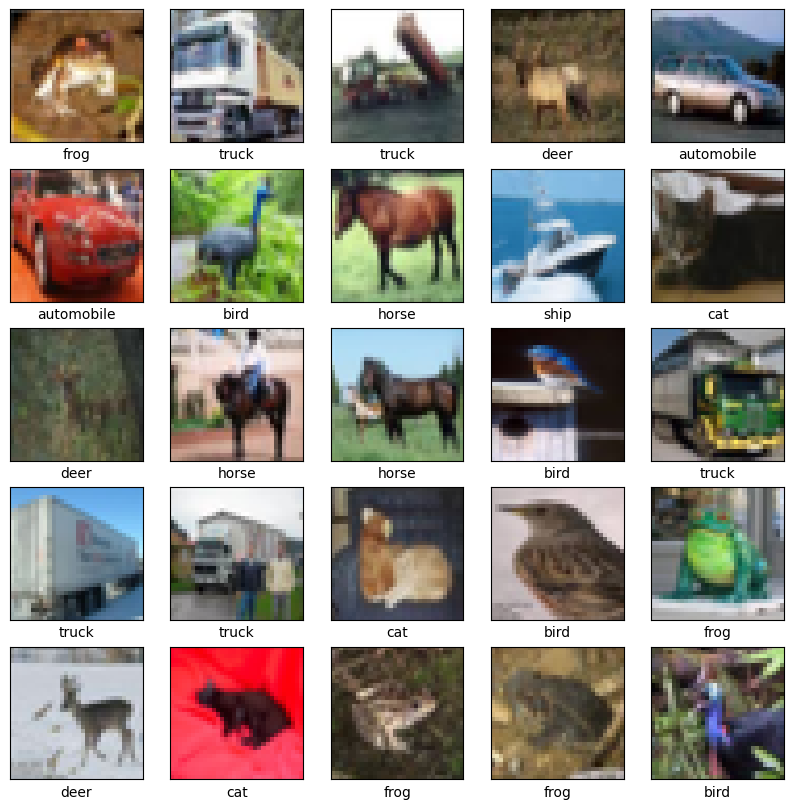

In [5]:
# prompt: Visualize data by plotting images

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Build CNN Model

This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API.

Here's a breakdown of each layer in the model:

**`keras.Input(shape=(32, 32, 3)):`** This defines the input layer of the model, specifying that it expects images of size 32x32 pixels with 3 color channels (RGB).

**`layers.Conv2D(32, kernel_size=(3, 3), activation="relu"):`** This is a convolutional layer with 32 filters, each having a kernel size of 3x3. It applies the Rectified Linear Unit (ReLU) activation function to the output. Convolutional layers are used to extract features from the input images.

**`layers.MaxPooling2D(pool_size=(2, 2)):`**
 This is a max pooling layer with a pool size of 2x2. It reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 region. Max pooling helps to reduce the number of parameters in the model and makes it more robust to small variations in the input.

**`layers.BatchNormalization():`** This layer applies batch normalization, which normalizes the activations of the previous layer. This can help to improve the training speed and stability of the model.

**`layers.Conv2D(64, kernel_size=(3, 3), activation="relu"):`** This is another convolutional layer, similar to the first one, but with 64 filters. It further extracts features from the input images.

**`layers.MaxPooling2D(pool_size=(2, 2)):`** Another max pooling layer, similar to the first one, further reducing the spatial dimensions of the feature maps.

**`layers.BatchNormalization():`** Another batch normalization layer, normalizing the activations of the previous layer.

**`layers.Flatten():`** This layer flattens the multi-dimensional feature maps into a single vector. This is necessary to connect the convolutional layers to the fully connected layers.

**`layers.Dropout(0.5):`** This layer applies dropout regularization, randomly setting a fraction (0.5 in this case) of the input units to 0 during training. This helps to prevent overfitting, where the model performs well on the training data but poorly on unseen data.

**`layers.Dense(10, activation="softmax"):`** This is the output layer of the model, a fully connected layer with 10 units. It uses the softmax activation function to produce a probability distribution over the 10 classes of the CIFAR-10 dataset. The class with the highest probability is the predicted class for the input image.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,826 (167.29 KB)

 Trainable params: 42,634 (166.54 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 78ms/step - accuracy: 0.3777 - loss: 2.0372 - val_accuracy: 0.5766 - val_loss: 1.2034
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.5741 - loss: 1.2436 - val_accuracy: 0.6330 - val_loss: 1.0752
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.6241 - loss: 1.0814 - val_accuracy: 0.6272 - val_loss: 1.0949
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.6475 - loss: 1.0174 - val_accuracy: 0.5910 - val_loss: 1.1708
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.6663 - loss: 0.9638 - val_accuracy: 0.6862 - val_loss: 0.9081
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.6842 - loss: 0.9178 - val_accuracy: 0.6668 - val_loss: 0.9656
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.6942 - loss: 0.8920 - val_accuracy: 0.6406 - val_loss: 1.0478
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.6964 - loss: 0.8677 - 

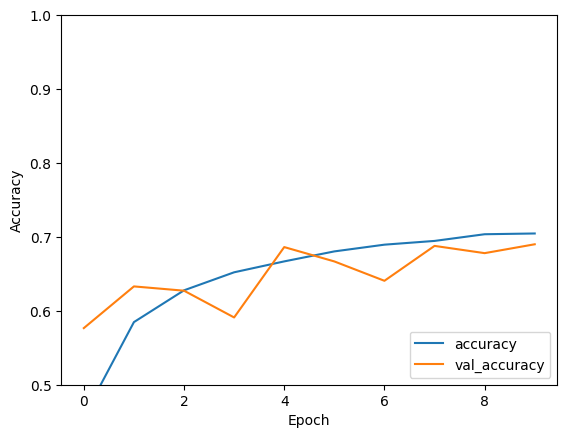

In [6]:
# prompt: Build a CNN model including Pooling and Normalization.

model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

model.summary()

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

**`accuracy:`** This metric represents the model's performance on the training data. It is calculated as the percentage of correctly classified images in the training set during each epoch. In our case, the training accuracy is around 70.71% for the 10th epoch.

**`val_accuracy: `**This metric, on the other hand, represents the model's performance on the validation data. Validation data is a portion of the training data that is set aside and not used for training the model. It is used to evaluate the model's ability to generalize to unseen data. The validation accuracy is calculated as the percentage of correctly classified images in the validation set after each epoch. In our case, the validation accuracy is around 69.00% for the 10th epoch.

**Let us check a couple of images and how they were classified:**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Original label is cat and predicted label is cat


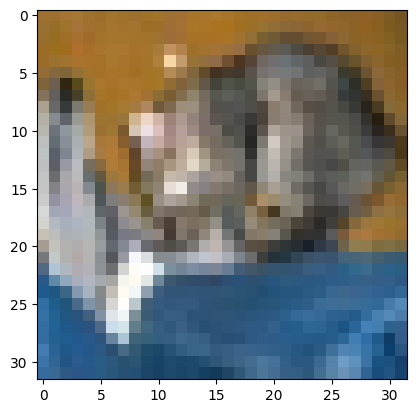

In [7]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Original label is truck and predicted label is bird


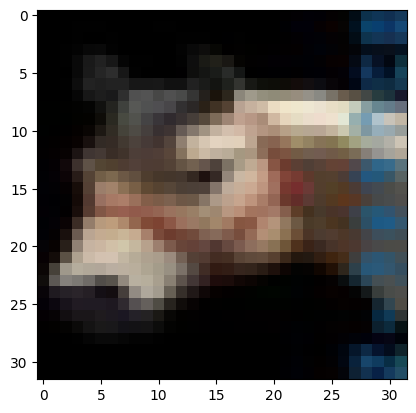

In [10]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 57

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))
